In [1]:
#Libraries for all functions
import math
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat


In [2]:
#Generate the seed of random 0s and 1s
def tausseed(r,q,num):
    Bi=[1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1]
    for i in range(q,num):
        Bi.append(Bi[i-r]^Bi[i-q])
    return Bi
    

In [3]:
#Generate Uniform(0,1)s from seed
def tausgen(Bi, l):
    splits=[]
    for i in range(0,len(Bi),l):
        splits.append(Bi[i:i+l])
    x0=[]
    for j in range(0,len(splits)):
        res = int("".join(str(x) for x in splits[j]), 2)
        x0.append(res/2**l)
    return x0

In [4]:
seed=tausseed(11,17,50000) #r, q, number of values
seed[:20]

[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]

In [5]:
X=tausgen(seed,20) #bitseed, length for generation(l)
X[100:120]

[0.16438579559326172,
 0.8424863815307617,
 0.11890602111816406,
 0.2545900344848633,
 0.019720077514648438,
 0.13687801361083984,
 0.4406099319458008,
 0.6293735504150391,
 0.9506025314331055,
 0.07414913177490234,
 0.8362131118774414,
 0.16130542755126953,
 0.7414369583129883,
 0.40328407287597656,
 0.32877254486083984,
 0.6849727630615234,
 0.23781204223632812,
 0.5091800689697266,
 0.039440155029296875,
 0.2737560272216797]

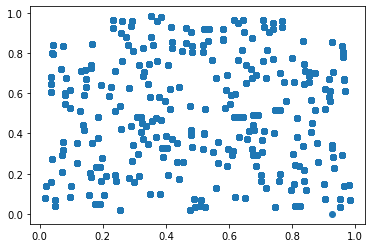

2501


In [6]:
#Plot of (x, x+1) on unit square
fig,ax=plt.subplots()
ax.scatter(X[:len(X)-1], X[1:len(X)])
plt.show()
print(len(X))

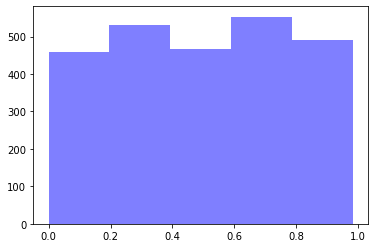

In [7]:
#histogram of values
num_bins=5
n, bins, patches = plt.hist(X, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [8]:
#chisquare
dfX=pd.DataFrame(X,columns=['Rand'])
dfX['quantiles'] = pd.cut(dfX['Rand'],bins=[0.00, .200, .400, .600, .800, 1.00])
dfX1=pd.DataFrame(dfX['quantiles'].value_counts())
#df1['observed']=df['quantiles'].value_counts()
dfX1['expected']=len(X)/5
st.chisquare(f_obs=dfX1['quantiles'], f_exp=dfX1['expected'])

Power_divergenceResult(statistic=7.394642143142744, pvalue=0.11644587454318388)

In [9]:
#Chi^2 statistic manual
sum(((dfX1['quantiles']-dfX1['expected'])**2)/dfX1['quantiles'])

7.326832592675396

In [10]:
#Runs test above/below
def runs(X):
    Runs, n1, n2 = 0,0,0
    XMedian=stat.mean(X)
    for i in range(len(X)):
        #Number of runs
        if (X[i] >= XMedian and X[i-1] < XMedian) or (X[i] < XMedian and X[i-1] >= XMedian):
            Runs +=1
        #Number of positive runs
        if(X[i]) >= XMedian:
            n1+=1
        #Number of negative runs
        else:
            n2+=1
    ExpB=((2*n1*n2)/(n1+n2))+1
    StdDevB=((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1)))**(1/2)
    Z0=(Runs-ExpB)/StdDevB
    if abs(Z0)<1.96:
        print("Success, Z-stat of", Z0)
    else:
        print("Failure, Z-stat of", Z0)
    return Z0

In [11]:
runs(X)

Success, Z-stat of -0.5399288491695212


-0.5399288491695212

In [12]:
#Convert U(0,1)s into Normal(0,1)s
def normals(Ui):
    normals=[]
    for i in range(len(Ui)):
        normals.append(st.norm.ppf(Ui[i]))
    return normals


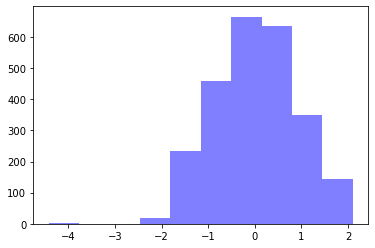

In [13]:
#Plot of Normal(0,1) from Uniform(0,1)
norms=normals(X)
num_bins=10
n, bins, patches = plt.hist(norms, num_bins, facecolor='blue', alpha=0.5)
plt.show()


In [14]:
min(norms), min(X)

(-4.427418854242837, 4.76837158203125e-06)

In [15]:
#Another algorithm for creating U(0,1)s, found online while researching Tausworthe Bitshift
xorshift_seed = 123456 # The initial seed should go here

def xorshift():
  global xorshift_seed
  xorshift_seed ^= xorshift_seed << 13
  xorshift_seed ^= xorshift_seed >> 17
  xorshift_seed ^= xorshift_seed << 5
  xorshift_seed %= int("ffffffff", 16) # The modulus limits it to a 32-bit number
  return xorshift_seed

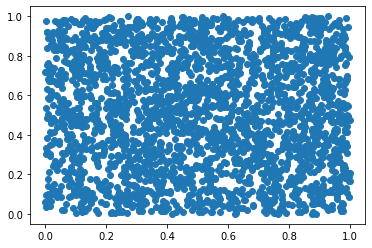

In [16]:
#Plot of (Y, Y+1) on unit square
Y=[]
for i in range(2500):
    Y.append(xorshift()/4294967295)

fig,ax=plt.subplots()
ax.scatter(Y[:len(Y)-1], Y[1:len(Y)]) #plotting on 1x1 square
plt.show()

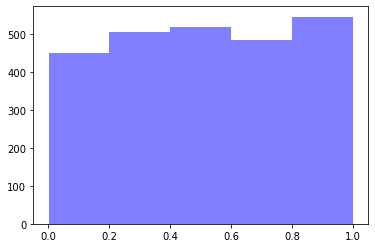

In [17]:
#Histogram of new data
num_bins=5
n, bins, patches = plt.hist(Y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [18]:
#Chi^2 Stat
dfY=pd.DataFrame(Y,columns=['Rand'])
dfY['quantiles'] = pd.cut(dfY['Rand'],bins=[0.00, .200, .400, .600, .800, 1.00])
dfY1=pd.DataFrame(dfY['quantiles'].value_counts())
dfY1['expected']=len(Y)/5
st.chisquare(f_obs=dfY1['quantiles'], f_exp=dfY1['expected'])

Power_divergenceResult(statistic=10.236, pvalue=0.03663450385917859)

In [19]:
#Chi^2 statistic manual
sum(((dfY1['quantiles']-dfY1['expected'])**2)/dfY1['quantiles'])

10.510762642822778

In [20]:
runs(Y)

Success, Z-stat of 1.240543379754807


1.240543379754807

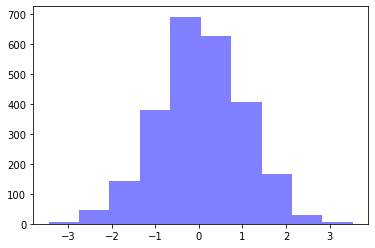

In [21]:
#Xorshift Normal(0,1)
normsY=normals(Y)
num_bins=10
n, bins, patches = plt.hist(normsY, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [22]:
min(normsY), min(Y)

(-3.4519501914950066, 0.00027827522723895386)

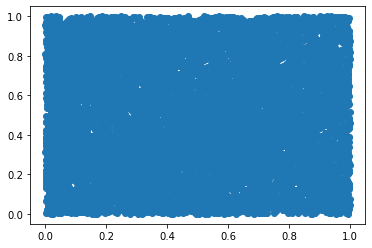

In [23]:
#Plot of (Z, Z+1) on unit square
Z=[]
for i in range(10000):
    Z.append(xorshift()/4294967295)

fig,ax=plt.subplots()
ax.scatter(Z[:len(Z)-1], Z[1:len(Z)]) #plotting on 1x1 square
plt.show()

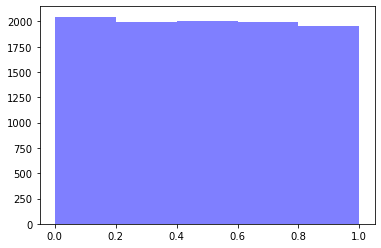

In [24]:
#Histogram of new data
num_bins=5
n, bins, patches = plt.hist(Z, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [25]:
#Chi^2 Stat
dfZ=pd.DataFrame(Z,columns=['Rand'])
dfZ['quantiles'] = pd.cut(dfZ['Rand'],bins=[0.00, .200, .400, .600, .800, 1.00])
dfZ1=pd.DataFrame(dfZ['quantiles'].value_counts())
dfZ1['expected']=len(Z)/5
st.chisquare(f_obs=dfZ1['quantiles'], f_exp=dfZ1['expected'])

Power_divergenceResult(statistic=1.944, pvalue=0.7460581417448875)

In [26]:
#Chi^2 statistic manual
sum(((dfZ1['quantiles']-dfZ1['expected'])**2)/dfZ1['quantiles'])

1.9420385511987994

In [27]:
runs(Z)

Success, Z-stat of 0.6634194936694298


0.6634194936694298

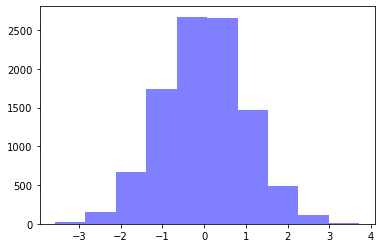

In [28]:
#Xorshift Normal(0,1)
normsZ=normals(Z)
num_bins=10
n, bins, patches = plt.hist(normsZ, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [29]:
min(normsZ), min(Z)

(-3.576758632976928, 0.00017394055616435142)